In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

In [23]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(23)

### 载入IRIS数据集，并进行简单的可视化

In [24]:
iris_data = pd.read_csv("iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


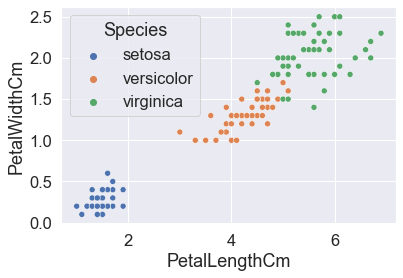

In [25]:
sns.scatterplot(data = iris_data, x = "PetalLengthCm", y="PetalWidthCm", hue="Species");

### 决策树（Decision Tree）分类器

In [26]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(iris_data[["PetalLengthCm", "PetalWidthCm"]], iris_data["Species"])

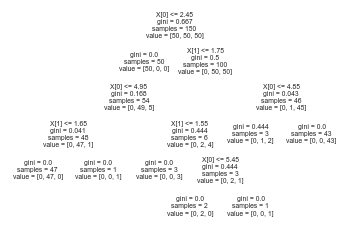

In [27]:
 tree.plot_tree(decision_tree_model);

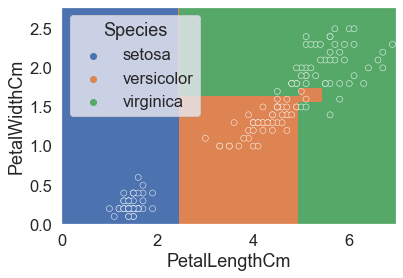

In [28]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "PetalLengthCm", y="PetalWidthCm", hue="Species");

In [29]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(
    iris_data[["PetalLengthCm", "PetalWidthCm"]])
accuracy_score(predictions, iris_data["Species"])

0.9933333333333333

### Overfitting

In [30]:
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

In [31]:
train_iris_data.shape

(110, 6)

In [32]:
test_iris_data.shape

(40, 6)

In [33]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(train_iris_data[["PetalLengthCm", "PetalWidthCm"]], train_iris_data["Species"])

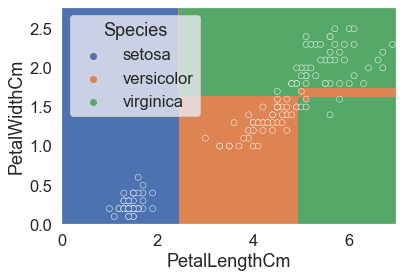

In [34]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "PetalLengthCm", y="PetalWidthCm", hue="Species");

In [35]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(train_iris_data[["PetalLengthCm", "PetalWidthCm"]])
accuracy_score(predictions, train_iris_data["Species"])

0.990909090909091

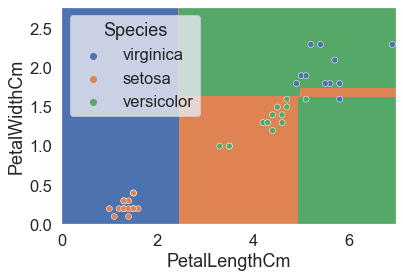

In [36]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "PetalLengthCm", y="PetalWidthCm", hue="Species");
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_test_only.png", dpi=300, bbox_inches = "tight")

In [37]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(test_iris_data[["PetalLengthCm", "PetalWidthCm"]])
accuracy_score(predictions, test_iris_data["Species"])

0.975

In [38]:
print("predictions",predictions)
print("test_iris_data['Species']",test_iris_data['Species'])

predictions ['virginica' 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica' 'versicolor'
 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa'
 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa']
test_iris_data['Species'] 148     virginica
38         setosa
22         setosa
60     versicolor
13         setosa
56     versicolor
96     versicolor
35         setosa
108     virginica
74     versicolor
66     versicolor
25         setosa
118     virginica
58     versicolor
124     virginica
83     versicolor
103     virginica
86     versicolor
15         setosa
116     virginica
129     virginica
65     versicolor
36         setosa
146     virginica
57     versicolor
145     virginica
79     versicolor
41         setosa
48    

In [39]:
from sklearn.metrics import classification_report
print(classification_report(test_iris_data['Species'], predictions) )


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.92      0.96        13
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        40
   macro avg       0.97      0.97      0.97        40
weighted avg       0.98      0.97      0.98        40

